In [27]:
import os
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [9]:
count = 0 
dataset_path = 'C:\\Users\\Levi\\Documents\\Machine Learning Practice\\Pest Images\\datasets'

dirs = os.listdir(dataset_path)
for dir in dirs:
    dir_path = os.path.join(dataset_path, dir)  # Properly join paths
    files = list(os.listdir(dir_path))
    
    print(f'{dir} Folder has {len(files)} Images')
    count += len(files)

print(f'Dataset Folder has {count} Images')

Brown Planthopper Folder has 876 Images
Green Leaf Hopper Folder has 990 Images
Rice Black Bug Folder has 403 Images
Rice Bug Folder has 734 Images
White Yellow Stemborer Folder has 703 Images
Dataset Folder has 3706 Images


In [10]:
#Load Images into Arrays as Dataset

In [11]:
base_dir = 'C:\\Users\\Levi\\Documents\\Machine Learning Practice\\Pest Images\\datasets'
img_size = 180
batch = 32

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.3,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.3,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 3706 files belonging to 5 classes.
Using 2595 files for training.
Found 3706 files belonging to 5 classes.
Using 1111 files for validation.


In [19]:
pest_names = train_ds.class_names
pest_names

['Brown Planthopper',
 'Green Leaf Hopper',
 'Rice Black Bug',
 'Rice Bug',
 'White Yellow Stemborer']

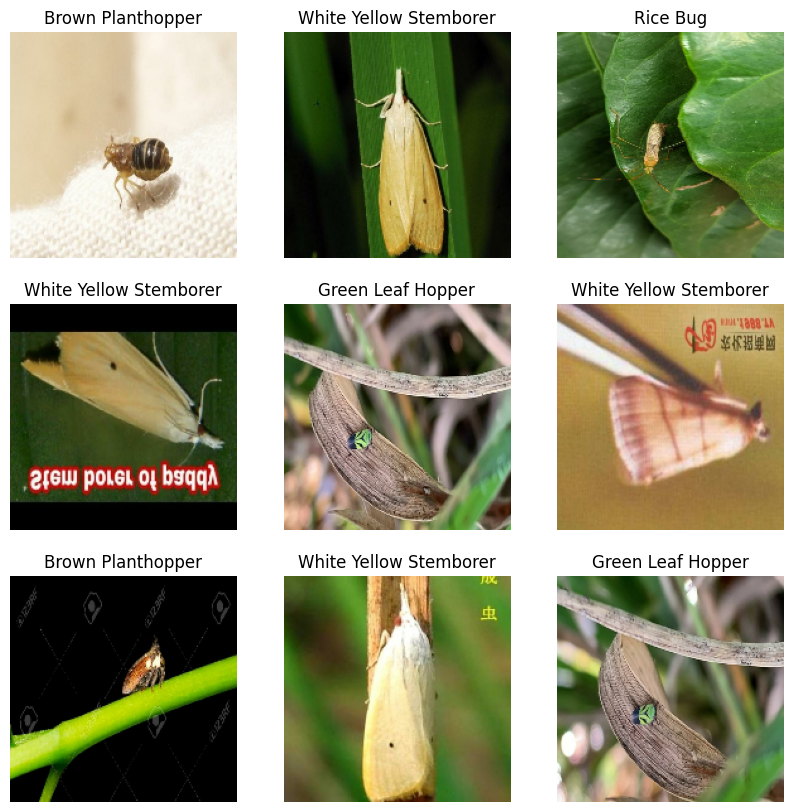

In [20]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(pest_names[labels[i]])
        plt.axis('off')

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [23]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [24]:
#Data Augmentation

In [29]:
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Explicit Input layer
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [30]:
#MODEL CREATION

In [31]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 42s 438ms/step - accuracy: 0.2921 - loss: 1.6363 - val_accuracy: 0.4365 - val_loss: 1.2742
Epoch 2/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 348ms/step - accuracy: 0.4811 - loss: 1.2377 - val_accuracy: 0.5122 - val_loss: 1.1627
Epoch 3/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.5675 - loss: 1.0742 - val_accuracy: 0.5869 - val_loss: 1.0996
Epoch 4/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 35s 427ms/step - accuracy: 0.6545 - loss: 0.9082 - val_accuracy: 0.6832 - val_loss: 0.7941
Epoch 5/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.7085 - loss: 0.7608 - val_accuracy: 0.6805 - val_loss: 0.9109
Epoch 6/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 27s 325ms/step - accuracy: 0.7335 - loss: 0.7104 - val_accuracy: 0.7291 - val_loss: 0.7577
Epoch 7/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 26s 322ms/step - accuracy: 0.7529 - loss: 0.6865 - val_accuracy: 0.7903 - val_loss: 0.6132
Epoch 8/15
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 353ms/step - accuracy: 0.7985 - loss: 0.5783 - val_accu

In [38]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + pest_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [39]:
classify_images('C:\\Users\\Levi\\Downloads\\data sets (1)\\data sets\\brown-plant-hopper-test.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'The Image belongs to Brown Planthopper with a score of 98.43741059303284'

In [ ]:
# Save the trained model
model.save("model.keras")